Imported Libaries

In [1]:
import os
root_dir = r'c:\Users\jf79\Cloned Repos\Footfall-Repo'
os.chdir(root_dir)

import pandas as pd
import numpy as np

import myfuncs.myfuncs as mf
import myfuncs.footfallfuncs as ff

mf.read_directory()

import warnings
warnings.filterwarnings('ignore')

Your Current Directory is: c:\Users\jf79\Cloned Repos\Footfall-Repo
Files in: ['.git', 'Footfall.venv', 'Footfall_Scripts', 'myfuncs', 'README.md', 'requirements.txt']



Plot Functions Specific to this Script

In [2]:
cwd = 'C:/Users/jf79/OneDrive - Office Shared Service/Documents/H&F Analysis/Footfall and Spend Analysis/Footfall Data/Hex Based/Footfall Counts'
os.chdir(cwd)
mf.read_directory()

Your Current Directory is: C:\Users\jf79\OneDrive - Office Shared Service\Documents\H&F Analysis\Footfall and Spend Analysis\Footfall Data\Hex Based\Footfall Counts
Files in: ['BT Hex ID to Borough Lookup Table.csv', 'hex_3hourly_counts_2022.csv', 'hex_3hourly_counts_2023.csv', 'hex_3hourly_counts_2024.csv', 'hex_3hourly_counts_2025.csv']



In [3]:
hex_to_borough_data = pd.read_csv('BT Hex ID to Borough Lookup Table.csv')


In [ ]:
lon_footfall_data = pd.DataFrame()
for file in os.listdir(cwd):
    if file.startswith('hex_3hourly_counts'):
        file_path = os.path.join(cwd, file)
        
        # Read Footfall CSVs
        df = pd.read_csv(file_path)
        
        # Join Footfall CSVs
        lon_footfall_data = pd.concat([lon_footfall_data, df], ignore_index=True)


lon_footfall_data = pd.merge(
    lon_footfall_data,hex_to_borough_data,
    left_on='hex_id', right_on='Hex_ID',
    how='left'
)

lon_footfall_data = lon_footfall_data.drop(
    columns = [
        'Hex_ID','GSS_CODE','day',
        'loyalty_percentage','dwell_time'
    ]
)

columns_to_fill = [
    'resident','visitor','worker'
]
lon_footfall_data.loc[:, columns_to_fill] = lon_footfall_data[columns_to_fill].applymap(lambda x: np.nan if x < 0 else x)
lon_footfall_data[columns_to_fill] = lon_footfall_data[columns_to_fill].fillna(0)
lon_footfall_data[columns_to_fill] = lon_footfall_data[columns_to_fill].astype('uint16')
lon_footfall_data['time_indicator'] = lon_footfall_data['time_indicator'].str.strip("'")
lon_footfall_data['count_date'] = pd.to_datetime(lon_footfall_data['count_date'])
lon_footfall_data['time_indicator'] = lon_footfall_data['time_indicator'].astype('category')

lon_footfall_data.sort_values(by=['count_date','time_indicator','hex_id'], inplace=True)

footfall_data = {
    0:lon_footfall_data,
    1:lon_footfall_data[lon_footfall_data['borough_name'] == 'Hammersmith and Fulham']
}


In [ ]:
plot_footfall = {}

for key, dataframe in footfall_data.items():
    df = ff.agg_footfall_data(
        dataframe, std=1,
        footfall_type=['residents', 'workers', 'visitors'],
    )
    df['corrected_ma_monthly_total'] = df.groupby(['year'])['corrected_value_total'].transform(lambda x: x.rolling(window=30, min_periods=1).mean().round())
    plot_footfall[key] = df
    


Aggregating footfall data...
Missing kwargs: {'primary_key', 'time_indicator', 'day_night', 'agg'}
These args will be set to default values

Applying features...
Features applied.


Detecting anomalies...
165 anomalies have been detected.
Anomalies have been flagged and corrected.


Detecting anomalies...
459 anomalies have been detected.
Anomalies have been flagged and corrected.


Detecting anomalies...
244 anomalies have been detected.
Anomalies have been flagged and corrected.

Footfall Data Aggregated.


Aggregating footfall data...
Missing kwargs: {'primary_key', 'time_indicator', 'day_night', 'agg'}
These args will be set to default values

Applying features...
Features applied.


Detecting anomalies...
174 anomalies have been detected.
Anomalies have been flagged and corrected.


Detecting anomalies...
440 anomalies have been detected.
Anomalies have been flagged and corrected.


Detecting anomalies...
248 anomalies have been detected.
Anomalies have been flagged and corrected

In [ ]:
for i in range(len(plot_footfall)):
    mf.display(plot_footfall[i])

,count_date,day_name,week_name,corrected_value_residents,corrected_value_workers,corrected_value_visitors,year,month,corrected_value_total,corrected_ma_monthly_total
0,2022-05-01,Sunday,Weekend,30052523.0,2943232.0,14845755.0,2022,5,47841510.0,47841510.0
1,2022-05-02,Monday,Weekday,35332390.0,3171128.0,14968014.0,2022,5,53471532.0,50656521.0
2,2022-05-03,Tuesday,Weekday,35087566.0,8337690.0,15128420.0,2022,5,58553676.0,53288906.0
3,2022-05-04,Wednesday,Weekday,35089222.0,8721856.0,15863953.0,2022,5,59675031.0,54885437.0
4,2022-05-05,Thursday,Weekday,34861629.0,8793386.0,16901325.0,2022,5,60556340.0,56019618.0
...,...,...,...,...,...,...,...,...,...,...
1009,2025-02-05,Wednesday,Weekday,45577950.0,11121726.0,18062548.0,2025,2,74762224.0,75195559.0
1010,2025-02-06,Thursday,Weekday,46921722.0,9210178.0,20230174.0,2025,2,76362074.0,75317329.0
1011,2025-02-07,Friday,Weekday,47560312.0,10046415.0,18970890.0,2025,2,76577617.0,75290393.0
1012,2025-02-08,Saturday,Weekend,47868620.0,9319380.0,18967639.0,2025,2,76155639.0,75387262.0


,count_date,day_name,week_name,corrected_value_residents,corrected_value_workers,corrected_value_visitors,year,month,corrected_value_total,corrected_ma_monthly_total
0,2022-05-01,Sunday,Weekend,632352.0,81597.0,441191.0,2022,5,1155140.0,1155140.0
1,2022-05-02,Monday,Weekday,759849.0,88812.0,507332.0,2022,5,1355993.0,1255566.0
2,2022-05-03,Tuesday,Weekday,766764.0,228901.0,445369.0,2022,5,1441034.0,1317389.0
3,2022-05-04,Wednesday,Weekday,771113.0,233988.0,460551.0,2022,5,1465652.0,1354455.0
4,2022-05-05,Thursday,Weekday,758224.0,237109.0,491985.0,2022,5,1487318.0,1381027.0
...,...,...,...,...,...,...,...,...,...,...
1009,2025-02-05,Wednesday,Weekday,992199.0,293477.0,508967.0,2025,2,1794643.0,1819120.0
1010,2025-02-06,Thursday,Weekday,1015543.0,245634.0,542322.0,2025,2,1803499.0,1821913.0
1011,2025-02-07,Friday,Weekday,1031430.0,267209.0,518171.0,2025,2,1816810.0,1820699.0
1012,2025-02-08,Saturday,Weekend,1030711.0,249867.0,578686.0,2025,2,1859264.0,1822748.0


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors

def plotting_footfall(df, df2=None, year=False, category=False, dual_axis=False):
    tf = df.copy()
    if df2 is not None:
        tf2 = df2.copy()
    title = f'Comparison of Normalised Footfall (Monthly MA)'
    if year:
        tf = tf[tf['year'] == year]
        if df2 is not None:
            tf2 = tf2[tf2['year'] == year]
        title = f'{title} ({year})'
    
    if category == 'normalized':
        tf['corrected_normalized'] = tf['corrected_ma_monthly_total']/tf['corrected_ma_monthly_total'].max()
        if df2 is not None:
            tf2['corrected_normalized'] = tf2['corrected_ma_monthly_total']/tf2['corrected_ma_monthly_total'].max()

    if dual_axis:
        fig, ax1 = plt.subplots(figsize=(10, 7))
        ax1.plot(
            tf['count_date'],
            tf[f'corrected_{category}'],
            label='Footfall (London)',
            color='red'
        )
        ax1.set_xlabel('Date', fontsize=14)
        ax1.set_ylabel('Footfall Count (London)', color='blue', fontsize=14)
        ax1.tick_params(axis='y', color='blue', labelsize=12)
        ax1.legend(loc='upper left')

        if df2 is not None:
            ax2 = ax1.twinx()  # Create a secondary y-axis
            ax2.plot(
                tf2['count_date'],
                tf2[f'corrected_{category}'],
                label='Footfall (H&F)',
                color='blue'
            )
            ax2.set_ylabel('Footfall Count (H&F)', color='red')
            ax2.tick_params(axis='y', labelcolor='red')
            ax2.legend(loc='upper right')

        plt.title(f'{title}')
        plt.show()

    if category and dual_axis == False:
        plt.figure(figsize=(12,7))

        plt.plot(
            tf['count_date'],
            tf[f'corrected_{category}'],
            label = 'Normalised Footfall (London)',
            color = 'red'
        )

        if df2 is not None:
            plt.plot(
            tf2['count_date'],
            tf2[f'corrected_{category}'],
            label = 'Normalised Footfall (H&F)',
            color = 'blue'
            )
        
        seasons = {
            'Winter':('01-01','03-20','lightblue'),
            'Spring':('03-21','06-20','lightgreen'),
            'Summer':('06-21','09-22','gold'),
            'Autumn':('09-23','12-21','orange'),
            'Christmas':('12-22','12-31','red'),
        }
        if year:
            plot_years = year
            for season, (start_md, end_md, colour) in seasons.items():
                start = f'{year}-{start_md}'
                end = f'{year}-{end_md}'
                plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=colour, alpha=0.25, label=season)
        else:
            plot_years = range(tf['year'].min(),tf['year'].max()+1)         
            for year in plot_years:
                for season, (start_md, end_md, colour) in seasons.items():
                    start = f'{year}-{start_md}'
                    end = f'{year}-{end_md}'
                    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=colour, alpha=0.25, label=season)
        
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Normalised Footfall', fontsize=12)
        plt.title(f'{title}', fontsize=16)
        plt.legend(
            by_label.values(),
            by_label.keys(),
            fontsize=9
        )
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.xlim(
            right = tf['count_date'].max(),
            left = tf['count_date'].min()
        )
        plt.show()

    else:
        print('## Please specify a category ##')

def plot_daily_footfall(df, df2=None, year=False, day_night=False):
    title = f'Comparison of Daytime and Nightime Footfall'
    merge_list = ['day_name']
    tf = df.copy()
    if df2 is not None:
        tf2 = df2.copy()
    if year:
        tf = tf[tf['year'] == year]
        if df2 is not None:
            tf2 = tf2[tf2['year'] == year]
        title = f'{title} ({year})'
    
    if day_night:
        tf = ff.transform_to_daynight(tf)
        if df2 is not None:
            tf2 = ff.transform_to_daynight(tf2)

    # Aggregate data for both datasets and merge them
    aggregated_data = tf.groupby(merge_list).agg(
        Nighttime_mean = ('6pm-6am','mean'),
        Daytime_mean = ('6am-6pm','mean'),
    ).reset_index()
    
    if df2 is not None:
        aggregated_data = pd.merge(
            aggregated_data,
            tf2.groupby(merge_list).agg(
            Nighttime_mean = ('6pm-6am','mean'),
            Daytime_mean = ('6am-6pm','mean'),
            ).reset_index(),
            how='left', on=merge_list,
            suffixes=['_lon', '_lbhf']
        )

    dictionary = {
        'Monday':'0',
        'Tuesday':'1',
        'Wednesday':'2',
        'Thursday':'3',
        'Friday':'4',
        'Saturday':'5',
        'Sunday':'6'
    }
    aggregated_data['day_order'] = aggregated_data['day_name'].map(dictionary)
    aggregated_data = aggregated_data.set_index('day_order').sort_index()
    
    # Extract categories and values for plotting
    categories = aggregated_data['day_name'].unique()

    if df2 is not None:
        night1 = aggregated_data['Nighttime_mean_lon']
        day1 = aggregated_data['Daytime_mean_lon']
        night2 = aggregated_data['Nighttime_mean_lbhf']
        day2 = aggregated_data['Daytime_mean_lbhf']
    else:
        night1 = aggregated_data['Nighttime_mean']
        day1 = aggregated_data['Daytime_mean']

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    index = np.arange(len(categories))

    if df2 is not None:
        # Plot daytime and nighttime footfall data
        ax.bar(index, day1, bar_width, label='Daytime Footfall (LDN)', color='skyblue')
        ax.bar([i + bar_width for i in index], night1, bar_width, label='Nighttime Footfall (LDN)', color='blue')
        ax.bar(index, day2, bar_width, label='Daytime Footfall (LBHF)', color='skyblue')
        ax.bar([i + bar_width for i in index], night2, bar_width, label='Nighttime Footfall (LBHF)', color='blue')
    else:
        # Plot daytime and nighttime footfall data
        ax.bar(index, day1, bar_width, label='Daytime Footfall (LBHF)', color='skyblue')
        ax.bar([i + bar_width for i in index], night1, bar_width, label='Nighttime Footfall (LBHF)', color='blue')

    # Set axis labels and title
    ax.set_xlabel("Days of the Week", fontsize=14)
    ax.set_ylabel("Total Footfall", fontsize=14)
    ax.set_title("Comparison of Daytime and Nighttime Footfall (2024)", fontsize=16)
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(aggregated_data['day_name'])
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1_000)}K'))
    ax.tick_params(axis='both', which='major', labelsize=12)
    if df2 is not None:
        ax.set_ylim([min(night2)-(min(night2)*0.1), max(day1) * 1.1])
    else:
        ax.set_ylim([min(night1)-(min(night1)*0.1), max(day1) * 1.1])

    ax.legend(fontsize=14)
    plt.tight_layout()
    plt.show()

def calulcaute_QoQ_values(df):
    df = df.set_index('count_date')
    df = df[['corrected_value_total']]
    quarterly_df = df.resample('Q').mean()
    # Calculate Quarter-over-Quarter (QoQ) percentage change
    quarterly_df['QoQ_change'] = quarterly_df['corrected_value_total'].pct_change() * 100
    # Calculate Year-over-Year (YoY) percentage change, looking back 4 quarters
    quarterly_df['YoY_change'] = quarterly_df['corrected_value_total'].pct_change(periods=4) * 100
    quarterly_df = quarterly_df.round(2)
    display(quarterly_df)
    return

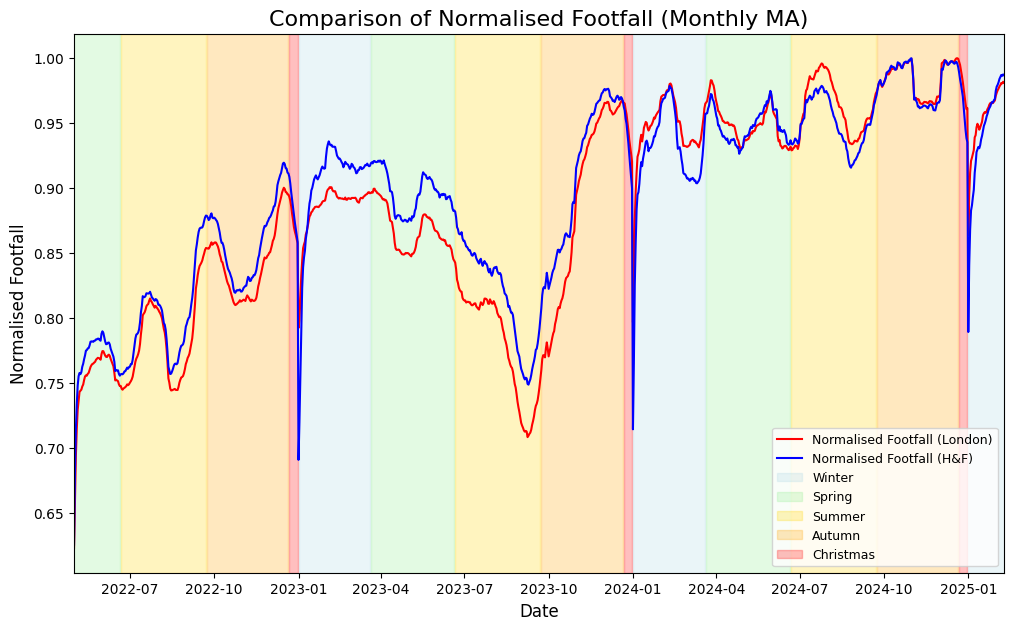

In [ ]:
plotting_footfall(plot_footfall[0], df2=plot_footfall[1], category='normalized')

In [ ]:
plot_daily_footfall(plot_footfall[0], year=2024, day_night=True)

In [ ]:
calulcaute_QoQ_values(plot_footfall[0])
calulcaute_QoQ_values(plot_footfall[1])